# Function Summarization Evaluation

In [ ]:
%pip install datasets transformers sentence_transformers pandas

In [4]:
from datasets import load_dataset
from transformers import T5ForConditionalGeneration, RobertaTokenizer
from sentence_transformers import SentenceTransformer, util

import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dataset = load_dataset("code_x_glue_ct_code_to_text", "python")

In [16]:
df = pd.DataFrame(dataset['test'])

In [24]:
tokenizer = RobertaTokenizer.from_pretrained("Salesforce/codet5-base")
model = T5ForConditionalGeneration.from_pretrained("Salesforce/codet5-base-multi-sum")
cosine_model = SentenceTransformer("sentence-transformers/multi-qa-distilbert-cos-v1")
finetuned_model = T5ForConditionalGeneration.from_pretrained(
    "cjwilliams/codet5_base_python_sum")
finetuned_model_small = T5ForConditionalGeneration.from_pretrained(
    "stmnk/codet5-small-code-summarization-python")

In [39]:
counter = 1
counter_fine = 1
counter_fine_small = 1
size = len(df)

In [40]:
def summarize(code_tokens):
    global counter, size
    print(f"Base {counter}/{size}")
    counter += 1
    input_ids = tokenizer(' '.join(code_tokens), return_tensors='pt').input_ids
    generated_ids = model.generate(input_ids, max_length=200)
    return tokenizer.decode(generated_ids[0], skip_special_tokens=True)

In [41]:
def summarize_finetuned(code_tokens):
    global counter_fine, size
    print(f"Fine tuned {counter_fine}/{size}")
    counter_fine += 1
    input_ids = tokenizer(' '.join(code_tokens), return_tensors='pt').input_ids
    generated_ids = finetuned_model.generate(input_ids, max_length=200)
    return tokenizer.decode(generated_ids[0], skip_special_tokens=True)

In [42]:
def summarize_finetuned_small(code_tokens):
    global counter_fine_small, size
    print(f"Small fine tuned {counter_fine_small}/{size}")
    counter_fine_small += 1
    input_ids = tokenizer(' '.join(code_tokens), return_tensors='pt').input_ids
    generated_ids = finetuned_model_small.generate(input_ids, max_length=200)
    return tokenizer.decode(generated_ids[0], skip_special_tokens=True)

In [19]:
%%time
df['summarization'] = df['code_tokens'].apply(summarize)

Base 1/14918
Base 2/14918
Base 3/14918
Base 4/14918
Base 5/14918
Base 6/14918
Base 7/14918
Base 8/14918
Base 9/14918
Base 10/14918
Base 11/14918
Base 12/14918
Base 13/14918
Base 14/14918
Base 15/14918
Base 16/14918
Base 17/14918
Base 18/14918
Base 19/14918
Base 20/14918
Base 21/14918
Base 22/14918
Base 23/14918
Base 24/14918
Base 25/14918
Base 26/14918
Base 27/14918
Base 28/14918
Base 29/14918
Base 30/14918
Base 31/14918
Base 32/14918
Base 33/14918
Base 34/14918
Base 35/14918
Base 36/14918
Base 37/14918
Base 38/14918
Base 39/14918
Base 40/14918
Base 41/14918
Base 42/14918
Base 43/14918
Base 44/14918
Base 45/14918
Base 46/14918
Base 47/14918
Base 48/14918
Base 49/14918
Base 50/14918
Base 51/14918
Base 52/14918
Base 53/14918
Base 54/14918
Base 55/14918
Base 56/14918
Base 57/14918
Base 58/14918
Base 59/14918
Base 60/14918
Base 61/14918
Base 62/14918
Base 63/14918
Base 64/14918
Base 65/14918
Base 66/14918
Base 67/14918
Base 68/14918
Base 69/14918
Base 70/14918
Base 71/14918
Base 72/14918
B

Base 555/14918
Base 556/14918
Base 557/14918
Base 558/14918
Base 559/14918
Base 560/14918
Base 561/14918
Base 562/14918
Base 563/14918
Base 564/14918
Base 565/14918
Base 566/14918
Base 567/14918
Base 568/14918
Base 569/14918
Base 570/14918
Base 571/14918
Base 572/14918
Base 573/14918
Base 574/14918
Base 575/14918
Base 576/14918
Base 577/14918
Base 578/14918
Base 579/14918
Base 580/14918
Base 581/14918
Base 582/14918
Base 583/14918
Base 584/14918
Base 585/14918
Base 586/14918
Base 587/14918
Base 588/14918
Base 589/14918
Base 590/14918
Base 591/14918
Base 592/14918
Base 593/14918
Base 594/14918
Base 595/14918
Base 596/14918
Base 597/14918
Base 598/14918
Base 599/14918
Base 600/14918
Base 601/14918
Base 602/14918
Base 603/14918
Base 604/14918
Base 605/14918
Base 606/14918
Base 607/14918
Base 608/14918
Base 609/14918
Base 610/14918
Base 611/14918
Base 612/14918
Base 613/14918
Base 614/14918
Base 615/14918
Base 616/14918
Base 617/14918
Base 618/14918
Base 619/14918
Base 620/14918
Base 621/1

Base 1095/14918
Base 1096/14918
Base 1097/14918
Base 1098/14918
Base 1099/14918
Base 1100/14918
Base 1101/14918
Base 1102/14918
Base 1103/14918
Base 1104/14918
Base 1105/14918
Base 1106/14918
Base 1107/14918
Base 1108/14918
Base 1109/14918
Base 1110/14918
Base 1111/14918
Base 1112/14918
Base 1113/14918
Base 1114/14918
Base 1115/14918
Base 1116/14918
Base 1117/14918
Base 1118/14918
Base 1119/14918
Base 1120/14918
Base 1121/14918
Base 1122/14918
Base 1123/14918
Base 1124/14918
Base 1125/14918
Base 1126/14918
Base 1127/14918
Base 1128/14918
Base 1129/14918
Base 1130/14918
Base 1131/14918
Base 1132/14918
Base 1133/14918
Base 1134/14918
Base 1135/14918
Base 1136/14918
Base 1137/14918
Base 1138/14918
Base 1139/14918
Base 1140/14918
Base 1141/14918
Base 1142/14918
Base 1143/14918
Base 1144/14918
Base 1145/14918
Base 1146/14918
Base 1147/14918
Base 1148/14918
Base 1149/14918
Base 1150/14918
Base 1151/14918
Base 1152/14918
Base 1153/14918
Base 1154/14918
Base 1155/14918
Base 1156/14918
Base 115

Base 1608/14918
Base 1609/14918
Base 1610/14918
Base 1611/14918
Base 1612/14918
Base 1613/14918
Base 1614/14918
Base 1615/14918
Base 1616/14918
Base 1617/14918
Base 1618/14918
Base 1619/14918
Base 1620/14918
Base 1621/14918
Base 1622/14918
Base 1623/14918
Base 1624/14918
Base 1625/14918
Base 1626/14918
Base 1627/14918
Base 1628/14918
Base 1629/14918
Base 1630/14918
Base 1631/14918
Base 1632/14918
Base 1633/14918
Base 1634/14918
Base 1635/14918
Base 1636/14918
Base 1637/14918
Base 1638/14918
Base 1639/14918
Base 1640/14918
Base 1641/14918
Base 1642/14918
Base 1643/14918
Base 1644/14918
Base 1645/14918
Base 1646/14918
Base 1647/14918
Base 1648/14918
Base 1649/14918
Base 1650/14918
Base 1651/14918
Base 1652/14918
Base 1653/14918
Base 1654/14918
Base 1655/14918
Base 1656/14918
Base 1657/14918
Base 1658/14918
Base 1659/14918
Base 1660/14918
Base 1661/14918
Base 1662/14918
Base 1663/14918
Base 1664/14918
Base 1665/14918
Base 1666/14918
Base 1667/14918
Base 1668/14918
Base 1669/14918
Base 167

Base 2121/14918
Base 2122/14918
Base 2123/14918
Base 2124/14918
Base 2125/14918
Base 2126/14918
Base 2127/14918
Base 2128/14918
Base 2129/14918
Base 2130/14918
Base 2131/14918
Base 2132/14918
Base 2133/14918
Base 2134/14918
Base 2135/14918
Base 2136/14918
Base 2137/14918
Base 2138/14918
Base 2139/14918
Base 2140/14918
Base 2141/14918
Base 2142/14918
Base 2143/14918
Base 2144/14918
Base 2145/14918
Base 2146/14918
Base 2147/14918
Base 2148/14918
Base 2149/14918
Base 2150/14918
Base 2151/14918
Base 2152/14918
Base 2153/14918
Base 2154/14918
Base 2155/14918
Base 2156/14918
Base 2157/14918
Base 2158/14918
Base 2159/14918
Base 2160/14918
Base 2161/14918
Base 2162/14918
Base 2163/14918
Base 2164/14918
Base 2165/14918
Base 2166/14918
Base 2167/14918
Base 2168/14918
Base 2169/14918
Base 2170/14918
Base 2171/14918
Base 2172/14918
Base 2173/14918
Base 2174/14918
Base 2175/14918
Base 2176/14918
Base 2177/14918
Base 2178/14918
Base 2179/14918
Base 2180/14918
Base 2181/14918
Base 2182/14918
Base 218

Base 2634/14918
Base 2635/14918
Base 2636/14918
Base 2637/14918
Base 2638/14918
Base 2639/14918
Base 2640/14918
Base 2641/14918
Base 2642/14918
Base 2643/14918
Base 2644/14918
Base 2645/14918
Base 2646/14918
Base 2647/14918
Base 2648/14918
Base 2649/14918
Base 2650/14918
Base 2651/14918
Base 2652/14918
Base 2653/14918
Base 2654/14918
Base 2655/14918
Base 2656/14918
Base 2657/14918
Base 2658/14918
Base 2659/14918
Base 2660/14918
Base 2661/14918
Base 2662/14918
Base 2663/14918
Base 2664/14918
Base 2665/14918
Base 2666/14918
Base 2667/14918
Base 2668/14918
Base 2669/14918
Base 2670/14918
Base 2671/14918
Base 2672/14918
Base 2673/14918
Base 2674/14918
Base 2675/14918
Base 2676/14918
Base 2677/14918
Base 2678/14918
Base 2679/14918
Base 2680/14918
Base 2681/14918
Base 2682/14918
Base 2683/14918
Base 2684/14918
Base 2685/14918
Base 2686/14918
Base 2687/14918
Base 2688/14918
Base 2689/14918
Base 2690/14918
Base 2691/14918
Base 2692/14918
Base 2693/14918
Base 2694/14918
Base 2695/14918
Base 269

Base 3147/14918
Base 3148/14918
Base 3149/14918
Base 3150/14918
Base 3151/14918
Base 3152/14918
Base 3153/14918
Base 3154/14918
Base 3155/14918
Base 3156/14918
Base 3157/14918
Base 3158/14918
Base 3159/14918
Base 3160/14918
Base 3161/14918
Base 3162/14918
Base 3163/14918
Base 3164/14918
Base 3165/14918
Base 3166/14918
Base 3167/14918
Base 3168/14918
Base 3169/14918
Base 3170/14918
Base 3171/14918
Base 3172/14918
Base 3173/14918
Base 3174/14918
Base 3175/14918
Base 3176/14918
Base 3177/14918
Base 3178/14918
Base 3179/14918
Base 3180/14918
Base 3181/14918
Base 3182/14918
Base 3183/14918
Base 3184/14918
Base 3185/14918
Base 3186/14918
Base 3187/14918
Base 3188/14918
Base 3189/14918
Base 3190/14918
Base 3191/14918
Base 3192/14918
Base 3193/14918
Base 3194/14918
Base 3195/14918
Base 3196/14918
Base 3197/14918
Base 3198/14918
Base 3199/14918
Base 3200/14918
Base 3201/14918
Base 3202/14918
Base 3203/14918
Base 3204/14918
Base 3205/14918
Base 3206/14918
Base 3207/14918
Base 3208/14918
Base 320

Base 3660/14918
Base 3661/14918
Base 3662/14918
Base 3663/14918
Base 3664/14918
Base 3665/14918
Base 3666/14918
Base 3667/14918
Base 3668/14918
Base 3669/14918
Base 3670/14918
Base 3671/14918
Base 3672/14918
Base 3673/14918
Base 3674/14918
Base 3675/14918
Base 3676/14918
Base 3677/14918
Base 3678/14918
Base 3679/14918
Base 3680/14918
Base 3681/14918
Base 3682/14918
Base 3683/14918
Base 3684/14918
Base 3685/14918
Base 3686/14918
Base 3687/14918
Base 3688/14918
Base 3689/14918
Base 3690/14918
Base 3691/14918
Base 3692/14918
Base 3693/14918
Base 3694/14918
Base 3695/14918
Base 3696/14918
Base 3697/14918
Base 3698/14918
Base 3699/14918
Base 3700/14918
Base 3701/14918
Base 3702/14918
Base 3703/14918
Base 3704/14918
Base 3705/14918
Base 3706/14918
Base 3707/14918
Base 3708/14918
Base 3709/14918
Base 3710/14918
Base 3711/14918
Base 3712/14918
Base 3713/14918
Base 3714/14918
Base 3715/14918
Base 3716/14918
Base 3717/14918
Base 3718/14918
Base 3719/14918
Base 3720/14918
Base 3721/14918
Base 372

Base 4173/14918
Base 4174/14918
Base 4175/14918
Base 4176/14918
Base 4177/14918
Base 4178/14918
Base 4179/14918
Base 4180/14918
Base 4181/14918
Base 4182/14918
Base 4183/14918
Base 4184/14918
Base 4185/14918
Base 4186/14918
Base 4187/14918
Base 4188/14918
Base 4189/14918
Base 4190/14918
Base 4191/14918
Base 4192/14918
Base 4193/14918
Base 4194/14918
Base 4195/14918
Base 4196/14918
Base 4197/14918
Base 4198/14918
Base 4199/14918
Base 4200/14918
Base 4201/14918
Base 4202/14918
Base 4203/14918
Base 4204/14918
Base 4205/14918
Base 4206/14918
Base 4207/14918
Base 4208/14918
Base 4209/14918
Base 4210/14918
Base 4211/14918
Base 4212/14918
Base 4213/14918
Base 4214/14918
Base 4215/14918
Base 4216/14918
Base 4217/14918
Base 4218/14918
Base 4219/14918
Base 4220/14918
Base 4221/14918
Base 4222/14918
Base 4223/14918
Base 4224/14918
Base 4225/14918
Base 4226/14918
Base 4227/14918
Base 4228/14918
Base 4229/14918
Base 4230/14918
Base 4231/14918
Base 4232/14918
Base 4233/14918
Base 4234/14918
Base 423

Base 4686/14918
Base 4687/14918
Base 4688/14918
Base 4689/14918
Base 4690/14918
Base 4691/14918
Base 4692/14918
Base 4693/14918
Base 4694/14918
Base 4695/14918
Base 4696/14918
Base 4697/14918
Base 4698/14918
Base 4699/14918
Base 4700/14918
Base 4701/14918
Base 4702/14918
Base 4703/14918
Base 4704/14918
Base 4705/14918
Base 4706/14918
Base 4707/14918
Base 4708/14918
Base 4709/14918
Base 4710/14918
Base 4711/14918
Base 4712/14918
Base 4713/14918
Base 4714/14918
Base 4715/14918
Base 4716/14918
Base 4717/14918
Base 4718/14918
Base 4719/14918
Base 4720/14918
Base 4721/14918
Base 4722/14918
Base 4723/14918
Base 4724/14918
Base 4725/14918
Base 4726/14918
Base 4727/14918
Base 4728/14918
Base 4729/14918
Base 4730/14918
Base 4731/14918
Base 4732/14918
Base 4733/14918
Base 4734/14918
Base 4735/14918
Base 4736/14918
Base 4737/14918
Base 4738/14918
Base 4739/14918
Base 4740/14918
Base 4741/14918
Base 4742/14918
Base 4743/14918
Base 4744/14918
Base 4745/14918
Base 4746/14918
Base 4747/14918
Base 474

Base 5199/14918
Base 5200/14918
Base 5201/14918
Base 5202/14918
Base 5203/14918
Base 5204/14918
Base 5205/14918
Base 5206/14918
Base 5207/14918
Base 5208/14918
Base 5209/14918
Base 5210/14918
Base 5211/14918
Base 5212/14918
Base 5213/14918
Base 5214/14918
Base 5215/14918
Base 5216/14918
Base 5217/14918
Base 5218/14918
Base 5219/14918
Base 5220/14918
Base 5221/14918
Base 5222/14918
Base 5223/14918
Base 5224/14918
Base 5225/14918
Base 5226/14918
Base 5227/14918
Base 5228/14918
Base 5229/14918
Base 5230/14918
Base 5231/14918
Base 5232/14918
Base 5233/14918
Base 5234/14918
Base 5235/14918
Base 5236/14918
Base 5237/14918
Base 5238/14918
Base 5239/14918
Base 5240/14918
Base 5241/14918
Base 5242/14918
Base 5243/14918
Base 5244/14918
Base 5245/14918
Base 5246/14918
Base 5247/14918
Base 5248/14918
Base 5249/14918
Base 5250/14918
Base 5251/14918
Base 5252/14918
Base 5253/14918
Base 5254/14918
Base 5255/14918
Base 5256/14918
Base 5257/14918
Base 5258/14918
Base 5259/14918
Base 5260/14918
Base 526

Base 5712/14918
Base 5713/14918
Base 5714/14918
Base 5715/14918
Base 5716/14918
Base 5717/14918
Base 5718/14918
Base 5719/14918
Base 5720/14918
Base 5721/14918
Base 5722/14918
Base 5723/14918
Base 5724/14918
Base 5725/14918
Base 5726/14918
Base 5727/14918
Base 5728/14918
Base 5729/14918
Base 5730/14918
Base 5731/14918
Base 5732/14918
Base 5733/14918
Base 5734/14918
Base 5735/14918
Base 5736/14918
Base 5737/14918
Base 5738/14918
Base 5739/14918
Base 5740/14918
Base 5741/14918
Base 5742/14918
Base 5743/14918
Base 5744/14918
Base 5745/14918
Base 5746/14918
Base 5747/14918
Base 5748/14918
Base 5749/14918
Base 5750/14918
Base 5751/14918
Base 5752/14918
Base 5753/14918
Base 5754/14918
Base 5755/14918
Base 5756/14918
Base 5757/14918
Base 5758/14918
Base 5759/14918
Base 5760/14918
Base 5761/14918
Base 5762/14918
Base 5763/14918
Base 5764/14918
Base 5765/14918
Base 5766/14918
Base 5767/14918
Base 5768/14918
Base 5769/14918
Base 5770/14918
Base 5771/14918
Base 5772/14918
Base 5773/14918
Base 577

Base 6225/14918
Base 6226/14918
Base 6227/14918
Base 6228/14918
Base 6229/14918
Base 6230/14918
Base 6231/14918
Base 6232/14918
Base 6233/14918
Base 6234/14918
Base 6235/14918
Base 6236/14918
Base 6237/14918
Base 6238/14918
Base 6239/14918
Base 6240/14918
Base 6241/14918
Base 6242/14918
Base 6243/14918
Base 6244/14918
Base 6245/14918
Base 6246/14918
Base 6247/14918
Base 6248/14918
Base 6249/14918
Base 6250/14918
Base 6251/14918
Base 6252/14918
Base 6253/14918
Base 6254/14918
Base 6255/14918
Base 6256/14918
Base 6257/14918
Base 6258/14918
Base 6259/14918
Base 6260/14918
Base 6261/14918
Base 6262/14918
Base 6263/14918
Base 6264/14918
Base 6265/14918
Base 6266/14918
Base 6267/14918
Base 6268/14918
Base 6269/14918
Base 6270/14918
Base 6271/14918
Base 6272/14918
Base 6273/14918
Base 6274/14918
Base 6275/14918
Base 6276/14918
Base 6277/14918
Base 6278/14918
Base 6279/14918
Base 6280/14918
Base 6281/14918
Base 6282/14918
Base 6283/14918
Base 6284/14918
Base 6285/14918
Base 6286/14918
Base 628

Base 6738/14918
Base 6739/14918
Base 6740/14918
Base 6741/14918
Base 6742/14918
Base 6743/14918
Base 6744/14918
Base 6745/14918
Base 6746/14918
Base 6747/14918
Base 6748/14918
Base 6749/14918
Base 6750/14918
Base 6751/14918
Base 6752/14918
Base 6753/14918
Base 6754/14918
Base 6755/14918
Base 6756/14918
Base 6757/14918
Base 6758/14918
Base 6759/14918
Base 6760/14918
Base 6761/14918
Base 6762/14918
Base 6763/14918
Base 6764/14918
Base 6765/14918
Base 6766/14918
Base 6767/14918
Base 6768/14918
Base 6769/14918
Base 6770/14918
Base 6771/14918
Base 6772/14918
Base 6773/14918
Base 6774/14918
Base 6775/14918
Base 6776/14918
Base 6777/14918
Base 6778/14918
Base 6779/14918
Base 6780/14918
Base 6781/14918
Base 6782/14918
Base 6783/14918
Base 6784/14918
Base 6785/14918
Base 6786/14918
Base 6787/14918
Base 6788/14918
Base 6789/14918
Base 6790/14918
Base 6791/14918
Base 6792/14918
Base 6793/14918
Base 6794/14918
Base 6795/14918
Base 6796/14918
Base 6797/14918
Base 6798/14918
Base 6799/14918
Base 680

Base 7251/14918
Base 7252/14918
Base 7253/14918
Base 7254/14918
Base 7255/14918
Base 7256/14918
Base 7257/14918
Base 7258/14918
Base 7259/14918
Base 7260/14918
Base 7261/14918
Base 7262/14918
Base 7263/14918
Base 7264/14918
Base 7265/14918
Base 7266/14918
Base 7267/14918
Base 7268/14918
Base 7269/14918
Base 7270/14918
Base 7271/14918
Base 7272/14918
Base 7273/14918
Base 7274/14918
Base 7275/14918
Base 7276/14918
Base 7277/14918
Base 7278/14918
Base 7279/14918
Base 7280/14918
Base 7281/14918
Base 7282/14918
Base 7283/14918
Base 7284/14918
Base 7285/14918
Base 7286/14918
Base 7287/14918
Base 7288/14918
Base 7289/14918
Base 7290/14918
Base 7291/14918
Base 7292/14918
Base 7293/14918
Base 7294/14918
Base 7295/14918
Base 7296/14918
Base 7297/14918
Base 7298/14918
Base 7299/14918
Base 7300/14918
Base 7301/14918
Base 7302/14918
Base 7303/14918
Base 7304/14918
Base 7305/14918
Base 7306/14918
Base 7307/14918
Base 7308/14918
Base 7309/14918
Base 7310/14918
Base 7311/14918
Base 7312/14918
Base 731

Base 7764/14918
Base 7765/14918
Base 7766/14918
Base 7767/14918
Base 7768/14918
Base 7769/14918
Base 7770/14918
Base 7771/14918
Base 7772/14918
Base 7773/14918
Base 7774/14918
Base 7775/14918
Base 7776/14918
Base 7777/14918
Base 7778/14918
Base 7779/14918
Base 7780/14918
Base 7781/14918
Base 7782/14918
Base 7783/14918
Base 7784/14918
Base 7785/14918
Base 7786/14918
Base 7787/14918
Base 7788/14918
Base 7789/14918
Base 7790/14918
Base 7791/14918
Base 7792/14918
Base 7793/14918
Base 7794/14918
Base 7795/14918
Base 7796/14918
Base 7797/14918
Base 7798/14918
Base 7799/14918
Base 7800/14918
Base 7801/14918
Base 7802/14918
Base 7803/14918
Base 7804/14918
Base 7805/14918
Base 7806/14918
Base 7807/14918
Base 7808/14918
Base 7809/14918
Base 7810/14918
Base 7811/14918
Base 7812/14918
Base 7813/14918
Base 7814/14918
Base 7815/14918
Base 7816/14918
Base 7817/14918
Base 7818/14918
Base 7819/14918
Base 7820/14918
Base 7821/14918
Base 7822/14918
Base 7823/14918
Base 7824/14918
Base 7825/14918
Base 782

Base 8277/14918
Base 8278/14918
Base 8279/14918
Base 8280/14918
Base 8281/14918
Base 8282/14918
Base 8283/14918
Base 8284/14918
Base 8285/14918
Base 8286/14918
Base 8287/14918
Base 8288/14918
Base 8289/14918
Base 8290/14918
Base 8291/14918
Base 8292/14918
Base 8293/14918
Base 8294/14918
Base 8295/14918
Base 8296/14918
Base 8297/14918
Base 8298/14918
Base 8299/14918
Base 8300/14918
Base 8301/14918
Base 8302/14918
Base 8303/14918
Base 8304/14918
Base 8305/14918
Base 8306/14918
Base 8307/14918
Base 8308/14918
Base 8309/14918
Base 8310/14918
Base 8311/14918
Base 8312/14918
Base 8313/14918
Base 8314/14918
Base 8315/14918
Base 8316/14918
Base 8317/14918
Base 8318/14918
Base 8319/14918
Base 8320/14918
Base 8321/14918
Base 8322/14918
Base 8323/14918
Base 8324/14918
Base 8325/14918
Base 8326/14918
Base 8327/14918
Base 8328/14918
Base 8329/14918
Base 8330/14918
Base 8331/14918
Base 8332/14918
Base 8333/14918
Base 8334/14918
Base 8335/14918
Base 8336/14918
Base 8337/14918
Base 8338/14918
Base 833

Base 8790/14918
Base 8791/14918
Base 8792/14918
Base 8793/14918
Base 8794/14918
Base 8795/14918
Base 8796/14918
Base 8797/14918
Base 8798/14918
Base 8799/14918
Base 8800/14918
Base 8801/14918
Base 8802/14918
Base 8803/14918
Base 8804/14918
Base 8805/14918
Base 8806/14918
Base 8807/14918
Base 8808/14918
Base 8809/14918
Base 8810/14918
Base 8811/14918
Base 8812/14918
Base 8813/14918
Base 8814/14918
Base 8815/14918
Base 8816/14918
Base 8817/14918
Base 8818/14918
Base 8819/14918
Base 8820/14918
Base 8821/14918
Base 8822/14918
Base 8823/14918
Base 8824/14918
Base 8825/14918
Base 8826/14918
Base 8827/14918
Base 8828/14918
Base 8829/14918
Base 8830/14918
Base 8831/14918
Base 8832/14918
Base 8833/14918
Base 8834/14918
Base 8835/14918
Base 8836/14918
Base 8837/14918
Base 8838/14918
Base 8839/14918
Base 8840/14918
Base 8841/14918
Base 8842/14918
Base 8843/14918
Base 8844/14918
Base 8845/14918
Base 8846/14918
Base 8847/14918
Base 8848/14918
Base 8849/14918
Base 8850/14918
Base 8851/14918
Base 885

Base 9303/14918
Base 9304/14918
Base 9305/14918
Base 9306/14918
Base 9307/14918
Base 9308/14918
Base 9309/14918
Base 9310/14918
Base 9311/14918
Base 9312/14918
Base 9313/14918
Base 9314/14918
Base 9315/14918
Base 9316/14918
Base 9317/14918
Base 9318/14918
Base 9319/14918
Base 9320/14918
Base 9321/14918
Base 9322/14918
Base 9323/14918
Base 9324/14918
Base 9325/14918
Base 9326/14918
Base 9327/14918
Base 9328/14918
Base 9329/14918
Base 9330/14918
Base 9331/14918
Base 9332/14918
Base 9333/14918
Base 9334/14918
Base 9335/14918
Base 9336/14918
Base 9337/14918
Base 9338/14918
Base 9339/14918
Base 9340/14918
Base 9341/14918
Base 9342/14918
Base 9343/14918
Base 9344/14918
Base 9345/14918
Base 9346/14918
Base 9347/14918
Base 9348/14918
Base 9349/14918
Base 9350/14918
Base 9351/14918
Base 9352/14918
Base 9353/14918
Base 9354/14918
Base 9355/14918
Base 9356/14918
Base 9357/14918
Base 9358/14918
Base 9359/14918
Base 9360/14918
Base 9361/14918
Base 9362/14918
Base 9363/14918
Base 9364/14918
Base 936

Base 9816/14918
Base 9817/14918
Base 9818/14918
Base 9819/14918
Base 9820/14918
Base 9821/14918
Base 9822/14918
Base 9823/14918
Base 9824/14918
Base 9825/14918
Base 9826/14918
Base 9827/14918
Base 9828/14918
Base 9829/14918
Base 9830/14918
Base 9831/14918
Base 9832/14918
Base 9833/14918
Base 9834/14918
Base 9835/14918
Base 9836/14918
Base 9837/14918
Base 9838/14918
Base 9839/14918
Base 9840/14918
Base 9841/14918
Base 9842/14918
Base 9843/14918
Base 9844/14918
Base 9845/14918
Base 9846/14918
Base 9847/14918
Base 9848/14918
Base 9849/14918
Base 9850/14918
Base 9851/14918
Base 9852/14918
Base 9853/14918
Base 9854/14918
Base 9855/14918
Base 9856/14918
Base 9857/14918
Base 9858/14918
Base 9859/14918
Base 9860/14918
Base 9861/14918
Base 9862/14918
Base 9863/14918
Base 9864/14918
Base 9865/14918
Base 9866/14918
Base 9867/14918
Base 9868/14918
Base 9869/14918
Base 9870/14918
Base 9871/14918
Base 9872/14918
Base 9873/14918
Base 9874/14918
Base 9875/14918
Base 9876/14918
Base 9877/14918
Base 987

Base 10309/14918
Base 10310/14918
Base 10311/14918
Base 10312/14918
Base 10313/14918
Base 10314/14918
Base 10315/14918
Base 10316/14918
Base 10317/14918
Base 10318/14918
Base 10319/14918
Base 10320/14918
Base 10321/14918
Base 10322/14918
Base 10323/14918
Base 10324/14918
Base 10325/14918
Base 10326/14918
Base 10327/14918
Base 10328/14918
Base 10329/14918
Base 10330/14918
Base 10331/14918
Base 10332/14918
Base 10333/14918
Base 10334/14918
Base 10335/14918
Base 10336/14918
Base 10337/14918
Base 10338/14918
Base 10339/14918
Base 10340/14918
Base 10341/14918
Base 10342/14918
Base 10343/14918
Base 10344/14918
Base 10345/14918
Base 10346/14918
Base 10347/14918
Base 10348/14918
Base 10349/14918
Base 10350/14918
Base 10351/14918
Base 10352/14918
Base 10353/14918
Base 10354/14918
Base 10355/14918
Base 10356/14918
Base 10357/14918
Base 10358/14918
Base 10359/14918
Base 10360/14918
Base 10361/14918
Base 10362/14918
Base 10363/14918
Base 10364/14918
Base 10365/14918
Base 10366/14918
Base 10367/149

Base 10791/14918
Base 10792/14918
Base 10793/14918
Base 10794/14918
Base 10795/14918
Base 10796/14918
Base 10797/14918
Base 10798/14918
Base 10799/14918
Base 10800/14918
Base 10801/14918
Base 10802/14918
Base 10803/14918
Base 10804/14918
Base 10805/14918
Base 10806/14918
Base 10807/14918
Base 10808/14918
Base 10809/14918
Base 10810/14918
Base 10811/14918
Base 10812/14918
Base 10813/14918
Base 10814/14918
Base 10815/14918
Base 10816/14918
Base 10817/14918
Base 10818/14918
Base 10819/14918
Base 10820/14918
Base 10821/14918
Base 10822/14918
Base 10823/14918
Base 10824/14918
Base 10825/14918
Base 10826/14918
Base 10827/14918
Base 10828/14918
Base 10829/14918
Base 10830/14918
Base 10831/14918
Base 10832/14918
Base 10833/14918
Base 10834/14918
Base 10835/14918
Base 10836/14918
Base 10837/14918
Base 10838/14918
Base 10839/14918
Base 10840/14918
Base 10841/14918
Base 10842/14918
Base 10843/14918
Base 10844/14918
Base 10845/14918
Base 10846/14918
Base 10847/14918
Base 10848/14918
Base 10849/149

Base 11273/14918
Base 11274/14918
Base 11275/14918
Base 11276/14918
Base 11277/14918
Base 11278/14918
Base 11279/14918
Base 11280/14918
Base 11281/14918
Base 11282/14918
Base 11283/14918
Base 11284/14918
Base 11285/14918
Base 11286/14918
Base 11287/14918
Base 11288/14918
Base 11289/14918
Base 11290/14918
Base 11291/14918
Base 11292/14918
Base 11293/14918
Base 11294/14918
Base 11295/14918
Base 11296/14918
Base 11297/14918
Base 11298/14918
Base 11299/14918
Base 11300/14918
Base 11301/14918
Base 11302/14918
Base 11303/14918
Base 11304/14918
Base 11305/14918
Base 11306/14918
Base 11307/14918
Base 11308/14918
Base 11309/14918
Base 11310/14918
Base 11311/14918
Base 11312/14918
Base 11313/14918
Base 11314/14918
Base 11315/14918
Base 11316/14918
Base 11317/14918
Base 11318/14918
Base 11319/14918
Base 11320/14918
Base 11321/14918
Base 11322/14918
Base 11323/14918
Base 11324/14918
Base 11325/14918
Base 11326/14918
Base 11327/14918
Base 11328/14918
Base 11329/14918
Base 11330/14918
Base 11331/149

Base 11755/14918
Base 11756/14918
Base 11757/14918
Base 11758/14918
Base 11759/14918
Base 11760/14918
Base 11761/14918
Base 11762/14918
Base 11763/14918
Base 11764/14918
Base 11765/14918
Base 11766/14918
Base 11767/14918
Base 11768/14918
Base 11769/14918
Base 11770/14918
Base 11771/14918
Base 11772/14918
Base 11773/14918
Base 11774/14918
Base 11775/14918
Base 11776/14918
Base 11777/14918
Base 11778/14918
Base 11779/14918
Base 11780/14918
Base 11781/14918
Base 11782/14918
Base 11783/14918
Base 11784/14918
Base 11785/14918
Base 11786/14918
Base 11787/14918
Base 11788/14918
Base 11789/14918
Base 11790/14918
Base 11791/14918
Base 11792/14918
Base 11793/14918
Base 11794/14918
Base 11795/14918
Base 11796/14918
Base 11797/14918
Base 11798/14918
Base 11799/14918
Base 11800/14918
Base 11801/14918
Base 11802/14918
Base 11803/14918
Base 11804/14918
Base 11805/14918
Base 11806/14918
Base 11807/14918
Base 11808/14918
Base 11809/14918
Base 11810/14918
Base 11811/14918
Base 11812/14918
Base 11813/149

Base 12237/14918
Base 12238/14918
Base 12239/14918
Base 12240/14918
Base 12241/14918
Base 12242/14918
Base 12243/14918
Base 12244/14918
Base 12245/14918
Base 12246/14918
Base 12247/14918
Base 12248/14918
Base 12249/14918
Base 12250/14918
Base 12251/14918
Base 12252/14918
Base 12253/14918
Base 12254/14918
Base 12255/14918
Base 12256/14918
Base 12257/14918
Base 12258/14918
Base 12259/14918
Base 12260/14918
Base 12261/14918
Base 12262/14918
Base 12263/14918
Base 12264/14918
Base 12265/14918
Base 12266/14918
Base 12267/14918
Base 12268/14918
Base 12269/14918
Base 12270/14918
Base 12271/14918
Base 12272/14918
Base 12273/14918
Base 12274/14918
Base 12275/14918
Base 12276/14918
Base 12277/14918
Base 12278/14918
Base 12279/14918
Base 12280/14918
Base 12281/14918
Base 12282/14918
Base 12283/14918
Base 12284/14918
Base 12285/14918
Base 12286/14918
Base 12287/14918
Base 12288/14918
Base 12289/14918
Base 12290/14918
Base 12291/14918
Base 12292/14918
Base 12293/14918
Base 12294/14918
Base 12295/149

Base 12719/14918
Base 12720/14918
Base 12721/14918
Base 12722/14918
Base 12723/14918
Base 12724/14918
Base 12725/14918
Base 12726/14918
Base 12727/14918
Base 12728/14918
Base 12729/14918
Base 12730/14918
Base 12731/14918
Base 12732/14918
Base 12733/14918
Base 12734/14918
Base 12735/14918
Base 12736/14918
Base 12737/14918
Base 12738/14918
Base 12739/14918
Base 12740/14918
Base 12741/14918
Base 12742/14918
Base 12743/14918
Base 12744/14918
Base 12745/14918
Base 12746/14918
Base 12747/14918
Base 12748/14918
Base 12749/14918
Base 12750/14918
Base 12751/14918
Base 12752/14918
Base 12753/14918
Base 12754/14918
Base 12755/14918
Base 12756/14918
Base 12757/14918
Base 12758/14918
Base 12759/14918
Base 12760/14918
Base 12761/14918
Base 12762/14918
Base 12763/14918
Base 12764/14918
Base 12765/14918
Base 12766/14918
Base 12767/14918
Base 12768/14918
Base 12769/14918
Base 12770/14918
Base 12771/14918
Base 12772/14918
Base 12773/14918
Base 12774/14918
Base 12775/14918
Base 12776/14918
Base 12777/149

Base 13201/14918
Base 13202/14918
Base 13203/14918
Base 13204/14918
Base 13205/14918
Base 13206/14918
Base 13207/14918
Base 13208/14918
Base 13209/14918
Base 13210/14918
Base 13211/14918
Base 13212/14918
Base 13213/14918
Base 13214/14918
Base 13215/14918
Base 13216/14918
Base 13217/14918
Base 13218/14918
Base 13219/14918
Base 13220/14918
Base 13221/14918
Base 13222/14918
Base 13223/14918
Base 13224/14918
Base 13225/14918
Base 13226/14918
Base 13227/14918
Base 13228/14918
Base 13229/14918
Base 13230/14918
Base 13231/14918
Base 13232/14918
Base 13233/14918
Base 13234/14918
Base 13235/14918
Base 13236/14918
Base 13237/14918
Base 13238/14918
Base 13239/14918
Base 13240/14918
Base 13241/14918
Base 13242/14918
Base 13243/14918
Base 13244/14918
Base 13245/14918
Base 13246/14918
Base 13247/14918
Base 13248/14918
Base 13249/14918
Base 13250/14918
Base 13251/14918
Base 13252/14918
Base 13253/14918
Base 13254/14918
Base 13255/14918
Base 13256/14918
Base 13257/14918
Base 13258/14918
Base 13259/149

Base 13683/14918
Base 13684/14918
Base 13685/14918
Base 13686/14918
Base 13687/14918
Base 13688/14918
Base 13689/14918
Base 13690/14918
Base 13691/14918
Base 13692/14918
Base 13693/14918
Base 13694/14918
Base 13695/14918
Base 13696/14918
Base 13697/14918
Base 13698/14918
Base 13699/14918
Base 13700/14918
Base 13701/14918
Base 13702/14918
Base 13703/14918
Base 13704/14918
Base 13705/14918
Base 13706/14918
Base 13707/14918
Base 13708/14918
Base 13709/14918
Base 13710/14918
Base 13711/14918
Base 13712/14918
Base 13713/14918
Base 13714/14918
Base 13715/14918
Base 13716/14918
Base 13717/14918
Base 13718/14918
Base 13719/14918
Base 13720/14918
Base 13721/14918
Base 13722/14918
Base 13723/14918
Base 13724/14918
Base 13725/14918
Base 13726/14918
Base 13727/14918
Base 13728/14918
Base 13729/14918
Base 13730/14918
Base 13731/14918
Base 13732/14918
Base 13733/14918
Base 13734/14918
Base 13735/14918
Base 13736/14918
Base 13737/14918
Base 13738/14918
Base 13739/14918
Base 13740/14918
Base 13741/149

Base 14165/14918
Base 14166/14918
Base 14167/14918
Base 14168/14918
Base 14169/14918
Base 14170/14918
Base 14171/14918
Base 14172/14918
Base 14173/14918
Base 14174/14918
Base 14175/14918
Base 14176/14918
Base 14177/14918
Base 14178/14918
Base 14179/14918
Base 14180/14918
Base 14181/14918
Base 14182/14918
Base 14183/14918
Base 14184/14918
Base 14185/14918
Base 14186/14918
Base 14187/14918
Base 14188/14918
Base 14189/14918
Base 14190/14918
Base 14191/14918
Base 14192/14918
Base 14193/14918
Base 14194/14918
Base 14195/14918
Base 14196/14918
Base 14197/14918
Base 14198/14918
Base 14199/14918
Base 14200/14918
Base 14201/14918
Base 14202/14918
Base 14203/14918
Base 14204/14918
Base 14205/14918
Base 14206/14918
Base 14207/14918
Base 14208/14918
Base 14209/14918
Base 14210/14918
Base 14211/14918
Base 14212/14918
Base 14213/14918
Base 14214/14918
Base 14215/14918
Base 14216/14918
Base 14217/14918
Base 14218/14918
Base 14219/14918
Base 14220/14918
Base 14221/14918
Base 14222/14918
Base 14223/149

Base 14648/14918
Base 14649/14918
Base 14650/14918
Base 14651/14918
Base 14652/14918
Base 14653/14918
Base 14654/14918
Base 14655/14918
Base 14656/14918
Base 14657/14918
Base 14658/14918
Base 14659/14918
Base 14660/14918
Base 14661/14918
Base 14662/14918
Base 14663/14918
Base 14664/14918
Base 14665/14918
Base 14666/14918
Base 14667/14918
Base 14668/14918
Base 14669/14918
Base 14670/14918
Base 14671/14918
Base 14672/14918
Base 14673/14918
Base 14674/14918
Base 14675/14918
Base 14676/14918
Base 14677/14918
Base 14678/14918
Base 14679/14918
Base 14680/14918
Base 14681/14918
Base 14682/14918
Base 14683/14918
Base 14684/14918
Base 14685/14918
Base 14686/14918
Base 14687/14918
Base 14688/14918
Base 14689/14918
Base 14690/14918
Base 14691/14918
Base 14692/14918
Base 14693/14918
Base 14694/14918
Base 14695/14918
Base 14696/14918
Base 14697/14918
Base 14698/14918
Base 14699/14918
Base 14700/14918
Base 14701/14918
Base 14702/14918
Base 14703/14918
Base 14704/14918
Base 14705/14918
Base 14706/149

In [ ]:
%%time
df['summarization_finetuned'] = df['code_tokens'].apply(summarize_finetuned)

Fine tuned 1/14918
Fine tuned 2/14918
Fine tuned 3/14918
Fine tuned 4/14918
Fine tuned 5/14918
Fine tuned 6/14918
Fine tuned 7/14918
Fine tuned 8/14918
Fine tuned 9/14918
Fine tuned 10/14918
Fine tuned 11/14918
Fine tuned 12/14918
Fine tuned 13/14918
Fine tuned 14/14918
Fine tuned 15/14918
Fine tuned 16/14918
Fine tuned 17/14918
Fine tuned 18/14918
Fine tuned 19/14918
Fine tuned 20/14918
Fine tuned 21/14918
Fine tuned 22/14918
Fine tuned 23/14918
Fine tuned 24/14918
Fine tuned 25/14918
Fine tuned 26/14918
Fine tuned 27/14918
Fine tuned 28/14918
Fine tuned 29/14918
Fine tuned 30/14918
Fine tuned 31/14918
Fine tuned 32/14918
Fine tuned 33/14918
Fine tuned 34/14918
Fine tuned 35/14918
Fine tuned 36/14918
Fine tuned 37/14918
Fine tuned 38/14918
Fine tuned 39/14918
Fine tuned 40/14918
Fine tuned 41/14918
Fine tuned 42/14918
Fine tuned 43/14918
Fine tuned 44/14918
Fine tuned 45/14918
Fine tuned 46/14918
Fine tuned 47/14918
Fine tuned 48/14918
Fine tuned 49/14918
Fine tuned 50/14918
Fine tune

Fine tuned 397/14918
Fine tuned 398/14918
Fine tuned 399/14918
Fine tuned 400/14918
Fine tuned 401/14918
Fine tuned 402/14918
Fine tuned 403/14918
Fine tuned 404/14918
Fine tuned 405/14918
Fine tuned 406/14918
Fine tuned 407/14918
Fine tuned 408/14918
Fine tuned 409/14918
Fine tuned 410/14918
Fine tuned 411/14918
Fine tuned 412/14918
Fine tuned 413/14918
Fine tuned 414/14918
Fine tuned 415/14918
Fine tuned 416/14918
Fine tuned 417/14918
Fine tuned 418/14918
Fine tuned 419/14918
Fine tuned 420/14918
Fine tuned 421/14918
Fine tuned 422/14918
Fine tuned 423/14918
Fine tuned 424/14918
Fine tuned 425/14918
Fine tuned 426/14918
Fine tuned 427/14918
Fine tuned 428/14918
Fine tuned 429/14918
Fine tuned 430/14918
Fine tuned 431/14918
Fine tuned 432/14918
Fine tuned 433/14918
Fine tuned 434/14918
Fine tuned 435/14918
Fine tuned 436/14918
Fine tuned 437/14918
Fine tuned 438/14918
Fine tuned 439/14918
Fine tuned 440/14918
Fine tuned 441/14918
Fine tuned 442/14918
Fine tuned 443/14918
Fine tuned 44

Fine tuned 788/14918
Fine tuned 789/14918
Fine tuned 790/14918
Fine tuned 791/14918
Fine tuned 792/14918
Fine tuned 793/14918
Fine tuned 794/14918
Fine tuned 795/14918
Fine tuned 796/14918
Fine tuned 797/14918
Fine tuned 798/14918
Fine tuned 799/14918
Fine tuned 800/14918
Fine tuned 801/14918
Fine tuned 802/14918
Fine tuned 803/14918
Fine tuned 804/14918
Fine tuned 805/14918
Fine tuned 806/14918
Fine tuned 807/14918
Fine tuned 808/14918
Fine tuned 809/14918
Fine tuned 810/14918
Fine tuned 811/14918
Fine tuned 812/14918
Fine tuned 813/14918
Fine tuned 814/14918
Fine tuned 815/14918
Fine tuned 816/14918
Fine tuned 817/14918
Fine tuned 818/14918
Fine tuned 819/14918
Fine tuned 820/14918
Fine tuned 821/14918
Fine tuned 822/14918
Fine tuned 823/14918
Fine tuned 824/14918
Fine tuned 825/14918
Fine tuned 826/14918
Fine tuned 827/14918
Fine tuned 828/14918
Fine tuned 829/14918
Fine tuned 830/14918
Fine tuned 831/14918
Fine tuned 832/14918
Fine tuned 833/14918
Fine tuned 834/14918
Fine tuned 83

Fine tuned 1171/14918
Fine tuned 1172/14918
Fine tuned 1173/14918
Fine tuned 1174/14918
Fine tuned 1175/14918
Fine tuned 1176/14918
Fine tuned 1177/14918
Fine tuned 1178/14918
Fine tuned 1179/14918
Fine tuned 1180/14918
Fine tuned 1181/14918
Fine tuned 1182/14918
Fine tuned 1183/14918
Fine tuned 1184/14918
Fine tuned 1185/14918
Fine tuned 1186/14918
Fine tuned 1187/14918
Fine tuned 1188/14918
Fine tuned 1189/14918
Fine tuned 1190/14918
Fine tuned 1191/14918
Fine tuned 1192/14918
Fine tuned 1193/14918
Fine tuned 1194/14918
Fine tuned 1195/14918
Fine tuned 1196/14918
Fine tuned 1197/14918
Fine tuned 1198/14918
Fine tuned 1199/14918
Fine tuned 1200/14918
Fine tuned 1201/14918
Fine tuned 1202/14918
Fine tuned 1203/14918
Fine tuned 1204/14918
Fine tuned 1205/14918
Fine tuned 1206/14918
Fine tuned 1207/14918
Fine tuned 1208/14918
Fine tuned 1209/14918
Fine tuned 1210/14918
Fine tuned 1211/14918
Fine tuned 1212/14918
Fine tuned 1213/14918
Fine tuned 1214/14918
Fine tuned 1215/14918
Fine tuned

Fine tuned 1544/14918
Fine tuned 1545/14918
Fine tuned 1546/14918
Fine tuned 1547/14918
Fine tuned 1548/14918
Fine tuned 1549/14918
Fine tuned 1550/14918
Fine tuned 1551/14918
Fine tuned 1552/14918
Fine tuned 1553/14918
Fine tuned 1554/14918
Fine tuned 1555/14918
Fine tuned 1556/14918
Fine tuned 1557/14918
Fine tuned 1558/14918
Fine tuned 1559/14918
Fine tuned 1560/14918
Fine tuned 1561/14918
Fine tuned 1562/14918
Fine tuned 1563/14918
Fine tuned 1564/14918
Fine tuned 1565/14918
Fine tuned 1566/14918
Fine tuned 1567/14918
Fine tuned 1568/14918
Fine tuned 1569/14918
Fine tuned 1570/14918
Fine tuned 1571/14918
Fine tuned 1572/14918
Fine tuned 1573/14918
Fine tuned 1574/14918
Fine tuned 1575/14918
Fine tuned 1576/14918
Fine tuned 1577/14918
Fine tuned 1578/14918
Fine tuned 1579/14918
Fine tuned 1580/14918
Fine tuned 1581/14918
Fine tuned 1582/14918
Fine tuned 1583/14918
Fine tuned 1584/14918
Fine tuned 1585/14918
Fine tuned 1586/14918
Fine tuned 1587/14918
Fine tuned 1588/14918
Fine tuned

In [ ]:
%%time
df['summarization_finetuned_small'] = df['code_tokens'].apply(summarize_finetuned_small)

In [22]:
def compare(summarization, docstring):
    embedding_1 = cosine_model.encode(summarization)
    embedding_2 = cosine_model.encode([docstring, ""])
    score = util.dot_score(embedding_1, embedding_2)[0].cpu().tolist()[0]
    return score

In [23]:
df['score'] = df.apply(lambda x: compare(x.summarization, ' '.join(x.docstring_tokens)), axis=1)
df['finetuned_score'] = df.apply(
    lambda x: compare(x.summarization_finetuned, ' '.join(x.docstring_tokens)), axis=1)
df['finetuned_small_score'] = df.apply(
    lambda x: compare(x.summarization_finetuned_small, ' '.join(x.docstring_tokens)), axis=1)

In [24]:
df['score'].median()

In [25]:
df['finetuned_score'].median()

In [26]:
df['finetuned_small_score'].median()

In [27]:
df.to_csv("summarization_results.csv", sep=',', encoding='utf-8')

In [43]:
df = pd.read_csv('summarization_results.csv')

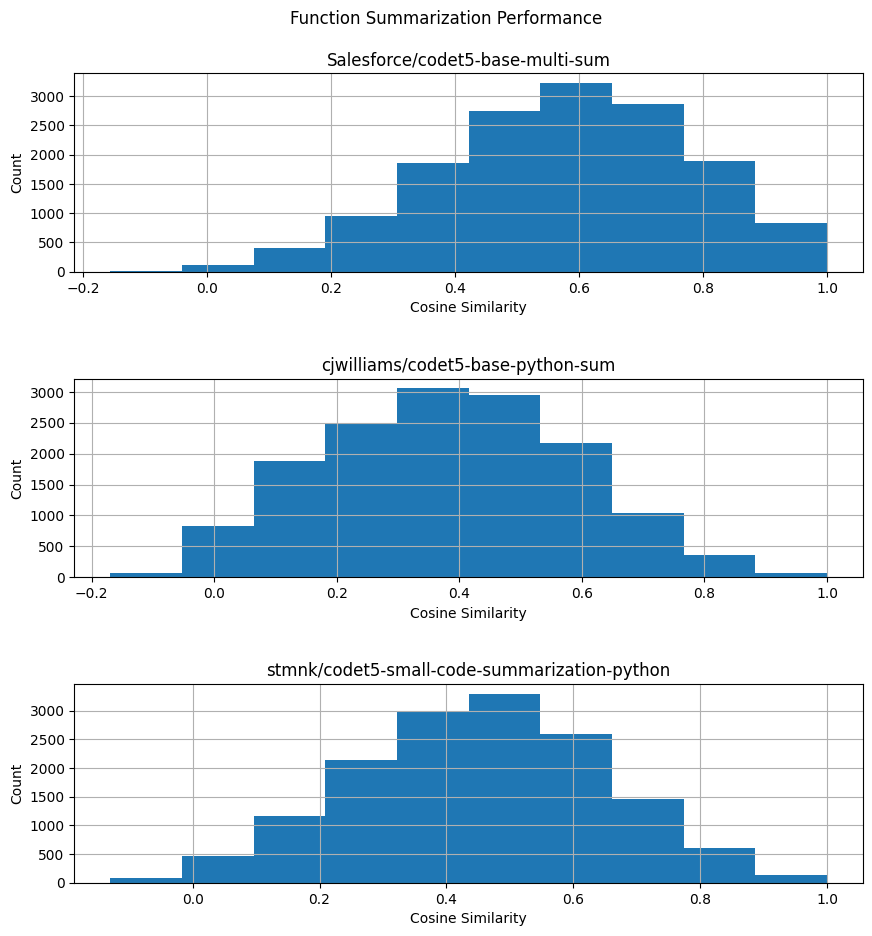

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,10))
df.loc[:, "score"].hist(ax=ax1)
df.loc[:, "finetuned_score"].hist(ax=ax2)
df.loc[:, "finetuned_small_score"].hist(ax=ax3)
fig.tight_layout(pad=6.0)
ax1.set_title("Salesforce/codet5-base-multi-sum")
ax2.set_title("cjwilliams/codet5_base_python_sum")
ax3.set_title("stmnk/codet5-small-code-summarization-python")
ax1.set_xlabel("Cosine Similarity")
ax2.set_xlabel("Cosine Similarity")
ax3.set_xlabel("Cosine Similarity")
ax1.set_ylabel("Count")
ax2.set_ylabel("Count")
ax3.set_ylabel("Count")
fig.suptitle("Function Summarization Performance")
fig.savefig("summarization-performance-histogram.png", bbox_inches='tight')

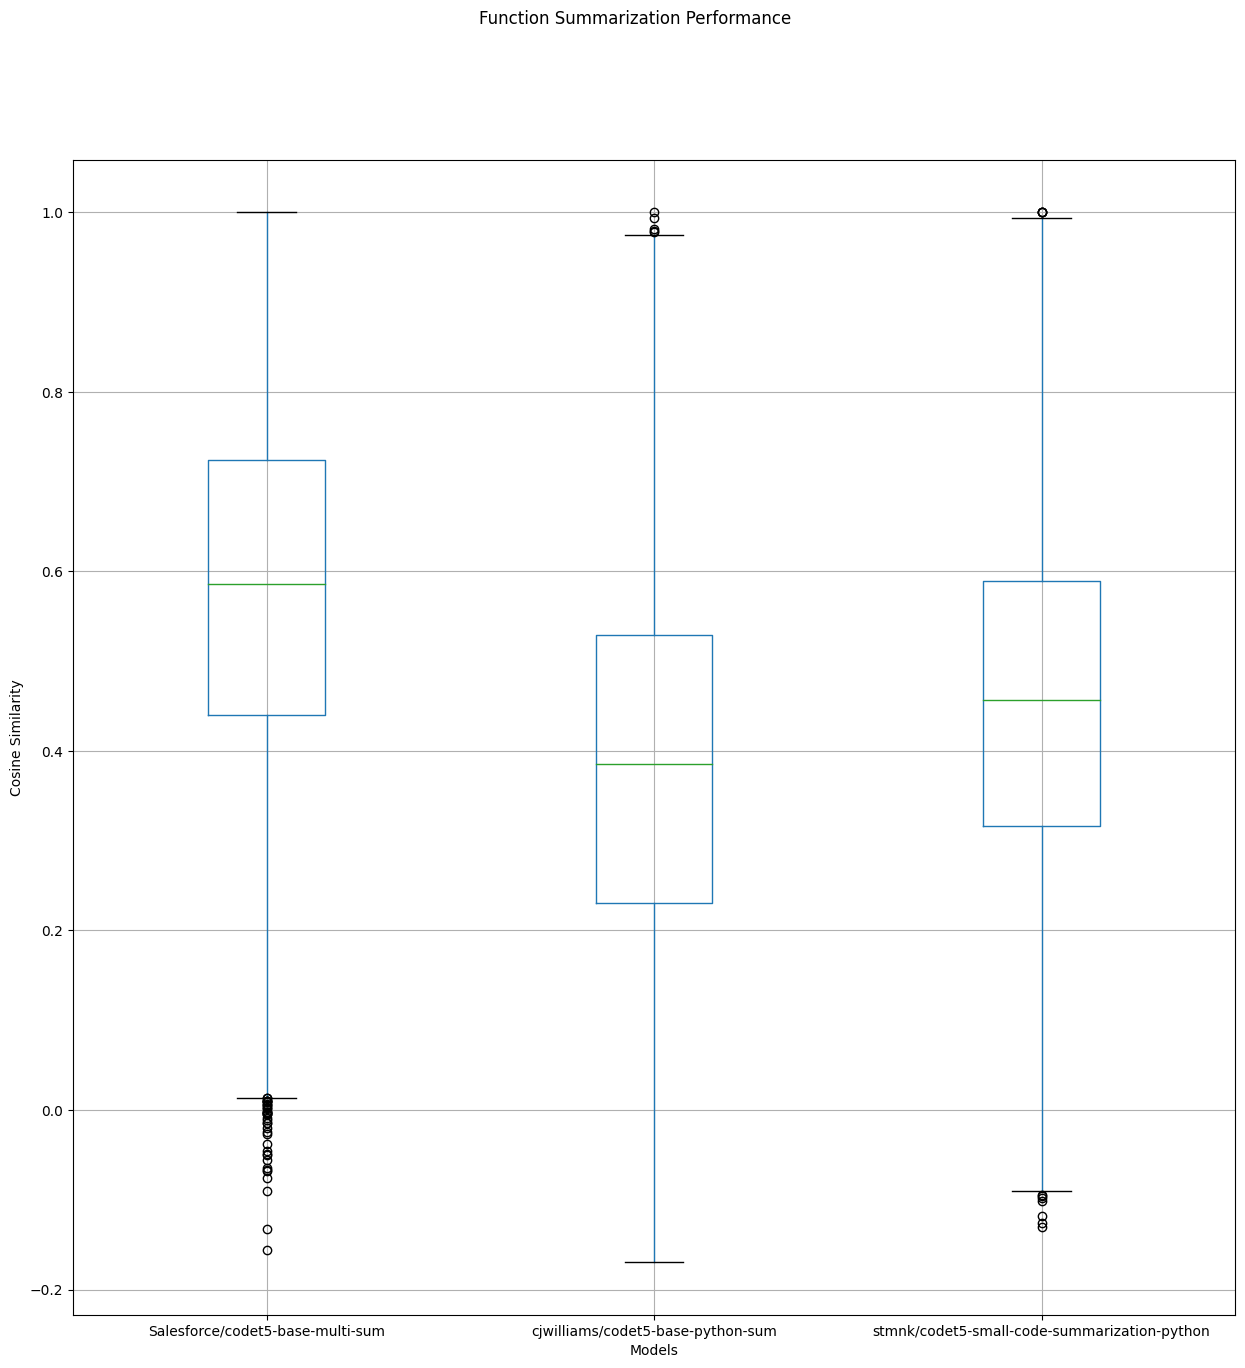

In [33]:
fig, ax = plt.subplots(1, figsize=(15,15))
df.rename(columns={"score": "Salesforce/codet5-base-multi-sum", "finetuned_score": "cjwilliams/codet5_base_python_sum", "finetuned_small_score": "stmnk/codet5-small-code-summarization-python"}).boxplot(column=['Salesforce/codet5-base-multi-sum', 'cjwilliams/codet5_base_python_sum', 'stmnk/codet5-small-code-summarization-python'], ax=ax)
ax.set_ylabel("Cosine Similarity")
ax.set_xlabel("Models")
fig.suptitle("Function Summarization Performance")
fig.savefig("summarization-performance-boxplot.png", bbox_inches='tight')

## Assessing duration of summarization execution

In [46]:
import time
res = pd.DataFrame(columns=['Salesforce/codet5-base-multi-sum', 'cjwilliams/codet5_base_python_sum', 'stmnk/codet5-small-code-summarization-python'])

for index, row in df.sample(n=50).iterrows():
    input_ids = tokenizer(' '.join(row['code_tokens']), return_tensors='pt').input_ids

    start = time.time()
    generated_ids = model.generate(input_ids, max_length=200)
    duration = time.time() - start

    start = time.time()
    generated_ids = finetuned_model.generate(input_ids, max_length=200)
    duration_fine = time.time() - start

    start = time.time()
    generated_ids = finetuned_model_small.generate(input_ids, max_length=200)
    duration_small = time.time() - start
    
    res = res.append({'Salesforce/codet5-base-multi-sum': duration, 'cjwilliams/codet5_base_python_sum': duration_fine, 'stmnk/codet5-small-code-summarization-python': duration_small}, ignore_index=True)

/var/folders/sq/5b2yb91n7z70j9sj4bm8m9kc0000gn/T/ipykernel_94298/3611906291.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Salesforce/codet5-base-multi-sum': duration, 'cjwilliams/codet5-base-python-sum': duration_fine, 'stmnk/codet5-small-code-summarization-python': duration_small}, ignore_index=True)
/var/folders/sq/5b2yb91n7z70j9sj4bm8m9kc0000gn/T/ipykernel_94298/3611906291.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Salesforce/codet5-base-multi-sum': duration, 'cjwilliams/codet5-base-python-sum': duration_fine, 'stmnk/codet5-small-code-summarization-python': duration_small}, ignore_index=True)
/var/folders/sq/5b2yb91n7z70j9sj4bm8m9kc0000gn/T/ipykernel_94298/3611906291.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pan

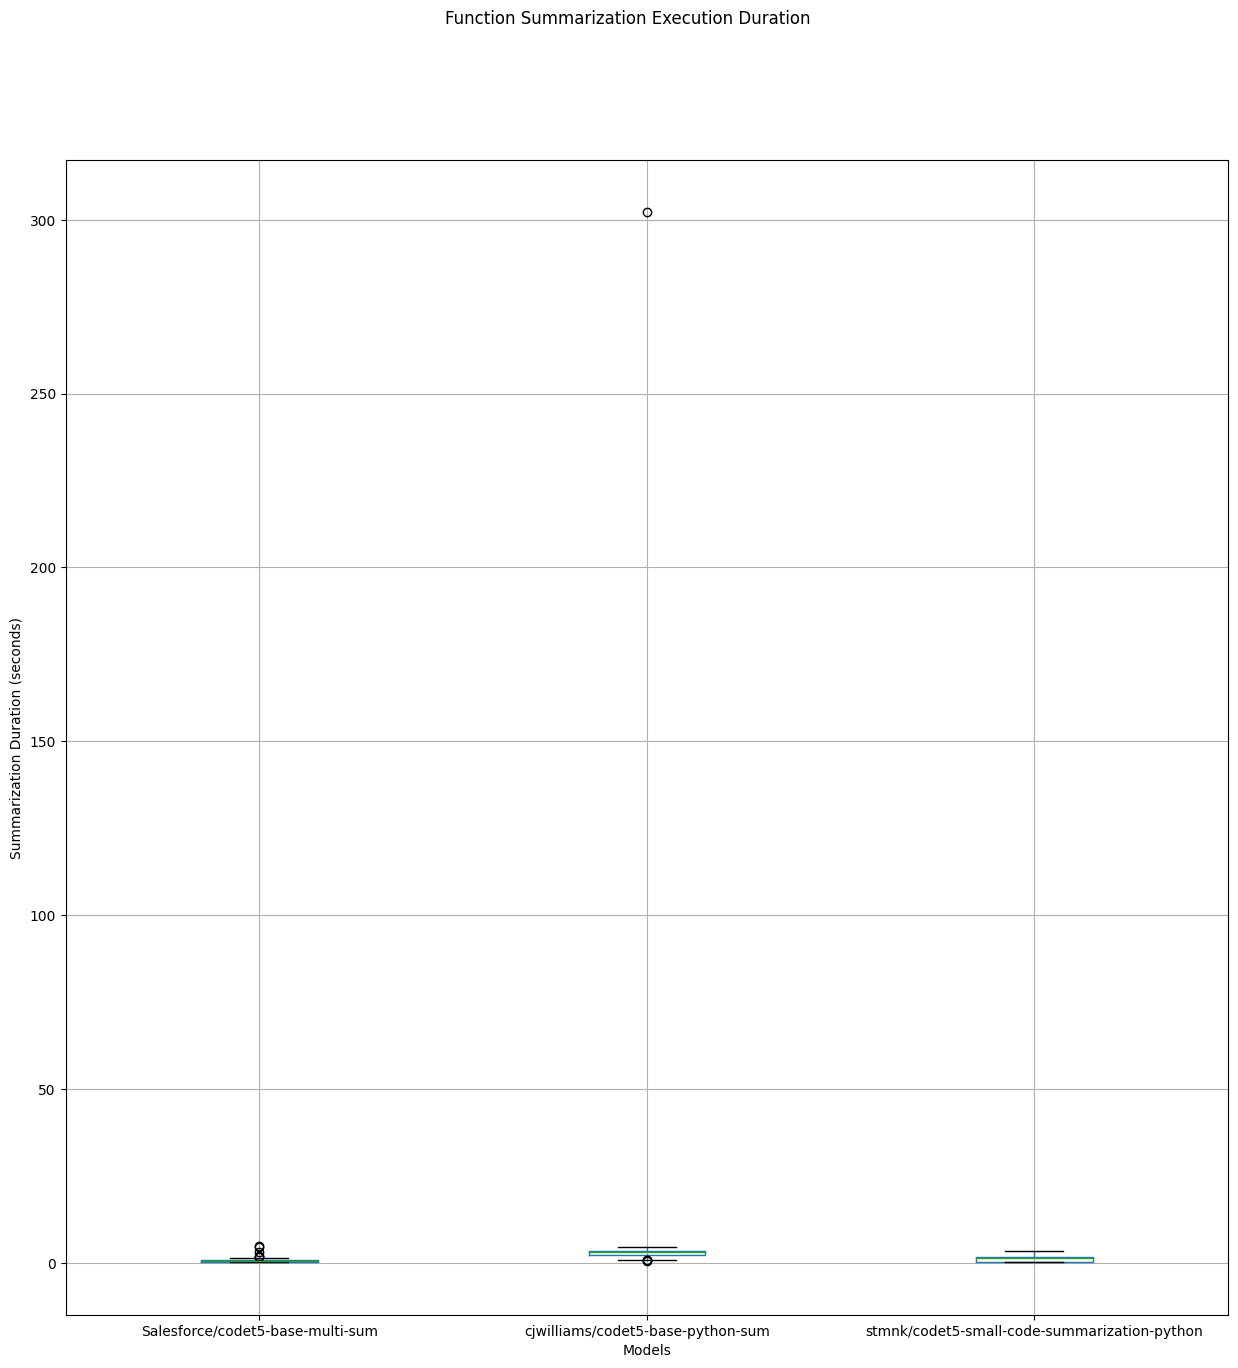

In [45]:
fig, ax = plt.subplots(1, figsize=(15,15))
res.boxplot(column=['Salesforce/codet5-base-multi-sum', 'cjwilliams/codet5_base_python_sum', 'stmnk/codet5-small-code-summarization-python'], ax=ax)
ax.set_ylabel("Summarization Duration (seconds)")
ax.set_xlabel("Models")
fig.suptitle("Function Summarization Execution Duration")
fig.savefig("summarization-speed-boxplot.png", bbox_inches='tight')

In [16]:
print(df['score'].median())

          multi-sum  base-python-sum  small-code-summarization-python
count  14913.000000     14913.000000                     14913.000000
mean       0.576679         0.382255                         0.452027
std        0.201077         0.203082                         0.195468
min       -0.156129        -0.169590                        -0.129925
25%        0.439506         0.231003                         0.316558
50%        0.585736         0.385123                         0.456507
75%        0.723760         0.528733                         0.589652
max        1.000000         1.000000                         1.000000
